#Taller 1




### Ejercicio 1
Paseo por la malla, se crea una matriz nxn, el autómata va a empezar en una de las esquinas, el tamaño del cromosoma se da por el resultado de nxn, la meta es cubrir todas las casillas del grafo, los movimientos del autómata van a ser arriba, abajo, derecha e izquierda y no se puede salir de la matriz.

---



Un paseo es una sucesión de movimientos sobre una malla entre celdas que comparten un lado. Si ninguna celda se visita dos veces, el paseo no se cruza. Si toda celda se visita el paseo es óptimo. Los paseos se pueden codificar como cadenas sobre el alfabeto {U, D, L, R} que se interpretan como los sucesivos movimientos del paseo, que empiezan en la esquina inferior izquierda . Cuando un movimiento intenta salir de la malla es ignorado.

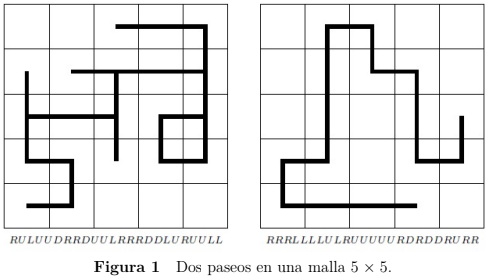

**En una malla 4 × 4:**

**i. Defina una función para evaluar el desempe ̃no de cada cromosoma.**

En primer lugar representará el ambiente en una matriz de la
siguiente manera

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

Donde cambiará según el movimiento del cromosoma, pasando a ser 1 si pisa una vez 0 2 si se pisa dos veces para saber si es cruzado Luego de ello se me dice que el paseo es óptimo si se pasa por todos los cuadros, por lo que debemos de tener en cuenta la cantidad de cuadros andados en el ambiente y la cantidad de cuadros del ambiente, para ello decimos que cuadros recorridos en el ambiente son los que no son 0 y la cantidad de cuadros son de nxn en este caso sería de 4x4 desempeño = cuadros andados / cantidad de cuadros --> donde el mejor sera =1

**ii. Cree aleatoriamente una población inicial de 5 cromosomas.**

[RLRLLLUUURRRDDLU] = 0,75
[1 1 1 1]
[1 0 1 1]
[1 0 1 1]
[2 1 0 0]
[RRRDDLURLRLLLUUU] = 0,625
[1 0 0 0]
[1 0 0 0]
[1 1 2 2]
[1 1 2 1]
[LUUURRRLRLLRDDLU]=0,6875
[1 1 2 2]
[1 0 1 1]
[1 0 1 1]
[1 0 0 0]
[RLRLLLUUURRRDDLU]=0,75
[1 1 1 1]
[1 0 1 1]
[1 0 1 1]
[2 2 0 0]
[LUUURDLULRLLRRRD]=0,4375
[2 2 1 1]
[2 1 0 1]
[1 0 0 0]
[1 0 0 0]

**iii. Haga una selección por ruleta con esa población.**

cromosoma1  |cromosoma2  |cromosoma3    |cromosoma4  |cromosoma5
0-0.23      |0.24 - 0.42 | 0.43 - 0.63  |0.64-0.87   |0.88 - 1

aleatoriamente obtuve los siguientes números 0.20, 0.80, 0.2, 0.25, 0.24 lo que hace referencia a los cromosomas {1,4,1,2,2}, además obtuvimos cromosomas repetido por lo que se podrán eliminar por lo que me quedaran los cromosomas {1,2,4}

**iv. Defina un operador de cruzamiento entre pares de cromosomas y uselo para
obtener una población intermedia.**

Para explicarlo tomaré los cromosomas 1 y 2 y los cruzamiento de punto fijo, este se dan con posiciones aleatorias, pero para mi ejemplo voy a decir que su posición es el de la mitad, la cual me separa la cabeza y la cola
Gen1=[RLRLLLUU|URRRDDLU|]
Gen2=[RRRDDLU|RLRLLLUUU]

Hijos, nueva población
CruceGen1Gen2=RLRLLLUULRLLLUUU
CruceGen2Gen1=RRRDDLUURRRDDLU

**v. Defina un operador de mutación y apliquelo a la población intermedia para
tener la nueva generación de cromosomas.**

El operador que deseo realizar es el reemplazo de un nucleótido que consiste en cambiar un gen en el cromosoma, puede ocurrir en cualquier lugar por lo que se hará con una posición y un gen de forma totalmente aleatoria
Gen1=[RLRLLLUULRLLLUUU]
Gen2=[RRRDDLUURRRDDLU]

Mutaciones
MutacionGen1=RLRLLLD|U|LRLLLUUU
mutacionGen2=RR|D|DDLUURRRDDLU

In [ ]:
mostrar= [1,2,3,4,5,6,7,8,9]

print(mostrar.index(max(mostrar)))

8


In [ ]:
import random

tamaño = int(input("Ingrese el tamaño de la Matriz: ")) #la variable n
tablero = [] #tablero para llenar
movimientos = ["U","D","L","R"] #los movimientos del automata
cromosomas = [] #matriz de cromosomas
crom = [] #cromosoma para llenar
contador = tamaño*tamaño #NxN
Ver = 0 #posicion vertical
Hor = 0 #posicion horizontal
fitness = tamaño*tamaño #definimos el fitness como el tamaño del tablero
calificaciones = [] #guardamos las calificaciones
desempeño = 0 #desempeño del cromosoma
ruleta = [] #seleccion de la ruleta
cruza = [] #cruzamiento
elitismo = [] #se escoge por elitismo
muta = [] #lista mutada
mutapor = 30 #porcentaje de mutacion


#crear el tablero de nxn
def crear_tablero():
  tablero = []
  for i in range(tamaño):
    tablero.append([])
    for h in range(tamaño):
      tablero[i].append(0)
  return(tablero)

#generar los cromosomas de nxn--------------------------------------------
for i in range(10):
  for h in range(contador):
    crom.append(random.choice(movimientos))
  cromosomas.append(crom)
  crom = []

#hacemos 10 vueltas para saber que sale-----------------------------------
for vueltas in range(100):
  print("Estos son los cromosomas: ", cromosomas)
  calificaciones = []
  #recorrido en el tablero------------------------------------------------
  for h in cromosomas:
    Ver = 0
    Hor = 0
    print("Este es el cromosoma: ", h)
    tablero = crear_tablero()
    for i in h:
      tablero[Ver][Hor] = 1
      if i == "U":
        if Ver < tamaño -1:
          Ver += 1
      elif i == "D":
        if Ver > 0:
          Ver -= 1
      elif i == "L":
        if Hor > 0:
          Hor -= 1
      elif i == "R":
        if Hor < tamaño - 1:
          Hor += 1
    print("Este es el recorrido del cromosoma: ", tablero)

    #calificamos el cromosoma-----------------------------------------
    cali = 0
    for i in tablero:
      cali = cali + i.count(1)
    desempeño = (cali /fitness)*100
    print("Este es el desempeño: ", desempeño)

    calificaciones.append(desempeño)


  #hacemos elitismo---------------------------------------------------
  print("estas son las calificaciones: ", calificaciones)
  print("este es el index del elitismo: ", calificaciones.index(max(calificaciones)))
  elitismo = cromosomas[calificaciones.index(max(calificaciones))]
  print("este es de elitismo: ", elitismo)

  #seleccion por ruleta------------------------------------------------
  ruleta = []
  ruleta.append(elitismo)

  while len(ruleta) < 5:
      sale = random.randrange(100)
      crom= random.choice(cromosomas)
      donde = cromosomas.index(crom)
      if sale <= calificaciones[donde]:
        ruleta.append(crom)


  print("esta es la ruleta: ", ruleta)

  #hacemos cruzamiento-------------------------------------------------
  cruza = []
  cruza.append(elitismo)
  for i in range(2):
    gen1 = random.choice(ruleta)
    gen2 = random.choice(ruleta)

    cortar = random.randrange(len(gen1))

    genh1 = gen1[cortar:] + gen2[:cortar]
    genh2 = gen2[cortar:] + gen1[:cortar]

    cruza.append(genh1)
    cruza.append(genh2)

  print("Este es el cruzamiento: ", cruza)

  #hacemos mutacion----------------------------------------------------

  muta = cruza
  for i in range(1, 3):
    sale = random.randrange(100)
    if sale <= mutapor:
      muta[i][muta[i].index(random.choice(muta[i]))] = random.choice(movimientos)

  print("Esta es la mutacion: ", muta)

  cromosomas = muta
  print("NUEVA ITERACION ----------------------------------")



2. En el problema Two-Dimensional Strip Packing (2SP) se tiene un conjunto de
n items rectangulares, cada uno con un ancho wj y una altura hj y una banda
de ancho W y altura infinita. El objetivo es encontrar una forma de ubicar
todos los items en la banda sin que se sobrepongan minimizando la altura a
la que la banda es usada. Se supone que los items tienen una orientación
fija, i.e., ellos se deben empacar con su base paralela a la base de la banda.
Por ejemplo:
n = 6, w1 = 6, h1 = 3, w2 = 5, h2 = 2, w3 = 2, h3 = 4, w4 = 3, h4 = 4, w5 = 3, h5 =
3, w6 = 2, h6 = 1, W = 10. En la figura 2 se ven posibles soluciones al
problema.
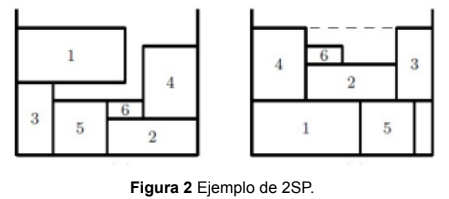

i. Defina un genotipo para codificar las posibles soluciones al problema.

w
i = ancho del bloque n = numero de bloques
h
j = Altura del bloque w = ancho de banda
Definimos un bloque
bloque = [w
i
, h
j
]

Donde el gen será un conjunto de permutaciones de tamaño n y las
posiciones en el orden que se irán agregando a la banda
cromosoma = [bloque
1
, bloque
2
,..., bloque
n
]
Para simplificar pondré el subíndice del bloque
cromosoma = [1, 2,..., n]
ii. Defina una función de desempeño para evaluar las posibles soluciones.

Lo interesante del problema es que debemos de tener el cuenta el ancho
de la banda, por lo que debemos de poner gran cuidado para no cometer
errores e ingresar un bloque donde no se debe, por lo que se debe llevar
la suma de los bloques en w para que la sumatoria no sobrepase a w, si

i

llega el caso se le debe reducir un bloque y empezar a agregar en la
parte superior
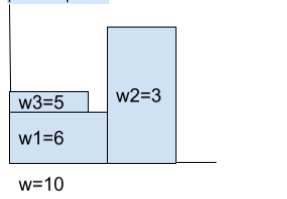
W10


Como se muestra la suma de
w1 + w2 + w3 > w se le resta un bloque y se pone en la parte superior desde el inicio
Ejemplo
bloque , , , ,
1 = [6, 3] bloque

2 = [5, 2] bloque

3 = [2, 4] bloque
4 = [3, 4]

bloque ,
5 = [3, 3] bloque
6 = [2, 1]

donde podría ser

cromosoma = [1, 5, 4, 2, 3, 6],cromosoma = [1, 3, 2, 6, 4, 5],
cromosoma = [1, 6, 4, 5, 3, 6]

Donde

min{h
i + h
j
}

iii. Defina operadores de cruzamiento y mutación. Ilustre todo con
ejemplos.
el operador de mutación será sencillo simplemente tomaremos

aleatoriamente dos números y los rotaremos ejemplo,
gen aleatoriamente se eligió el 4 y el 6 por lo que
1 = [1, 5, 4, 2, 3, 6]
quedra

gen y ya tenemos la mutación

3. Uno de los problemas más conocidos y estudiados en computación es el
llamado problema del agente viajero. En este problema se tiene un conjunto de
n ciudades y para cada par de ciudades ci

, cj se tiene un valor (que puede ser
una distancia o el costo de viajar de una ciudad a otra). El problema consiste
simplemente en encontrar un recorrido que visite todas las ciudades,
usualmente empezando y regresando a una ciudad determinada, y que tenga
un valor total mínimo.
Obviamente se han usado algoritmos genéticos para tratar el problema. Un
cromosoma puede ser simplemente una cadena de números que inicia en 1
y termina en 1, siendo el resto de la cadena una permutación de los
números del 2 al n.

i. Defina una función de desempeño para evaluar las posibles
soluciones.
En primer lugar debemos definir en qué estructura de datos vamos a
representar las distancias de las ciudades,hay que tener en cuenta que
en este ejercicio tomare que puedo ir de cualquier ciudad a otra,por lo
que lo representará de la siguiente manera

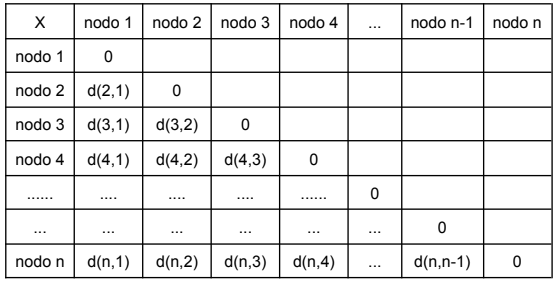

es una matriz en donde d(i,j) es la distancia que hay de una ciudad i a
una ciudad j, cada nodo es una ciudad, por lo que su representación se
hace sencillo, paso seguido utilizó una lista de números que me
representaran las ciudades es decir el cromosoma en donde tendrá un
rango del número de ciudades + 1 ya que debo de terminar en el origen
del recorrido
Por ejemplo
ciudades=[1,2,3,4,5,6...n,1]
con esto es fácil determinar la función que me determine el desempeño,
simplemente es la suma de todas las distancias
min{desempeño = d(1, 2) + d(2, 3) +... + d(i, j)}; donde el valor óptimo es el menor

Ejemplo de un viajero con recorrido de 4 ciudades
En primer lugar se le debe de agregar las distancias entre ciudades para
ello utilizó la estructura anteriormente mencionada

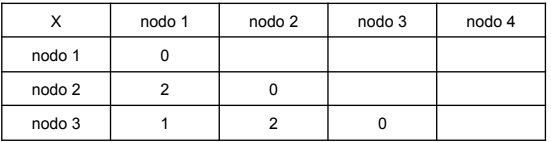

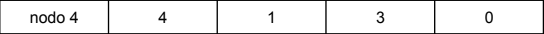


Paso siguiente es crear mi cromosoma, como lo dije anteriormente
utilizare tomaré un punto de partida e ingreso el resto a la sar
ciudades=[1,4,2,3,1]
desempeño = d(1, 4) + d(4, 2) + d(2, 3) + d(3, 1) = 4 + 1 + 2 + 1 = 8
Este cromosoma tendrá un desempeño de 8
ii. Defina operadores de cruzamiento y mutación. Ilustre todo con
ejemplos.
Cruce se hará de forma punto fijo es decir de la siguiente manera
[1,2,4,2,1]
[1,3,2,4,1]
Donde al obtener los hijos los genes que se repiten se cambiará por otro
hasta que que solo los genes iniciales y finales iguala para ello se debe
de aplicar mutación la cual organizará el cromosoma, el cual se ara el de
cambio de un una ciudad repetida,
Ejemplo
hijo1=[1,2,2,4,1]
hijo2=[1,3,4,2,1]
como se puede observar el hijo dos quedó organizado por lo que no
mutará en cambio el hijo 1 deberá mutar por lo que se situara en el gen
repetido y lo cambiará por uno que le haga falta en el caso del ejemplo
hijo1=[1,2,2,4,1]
Al mutar ve que le hace falta el gen 3 por lo que encuentra el repetido y lo
cambia de la siguiente manera
hijo1mutado=[1,2,3,4,1]

---

## Taller 2

####Ejercicio 2

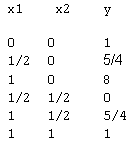

Construir una red RBF con 3 neuronas (1, 1) (1, 0) (0, 0) con funciones gaussianas con desviación estándar ½

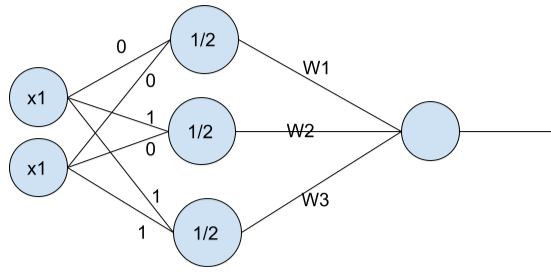




In [ ]:
import numpy as np
import math

def gauss(net):
  desv= 1/2
  return np.exp(-(net**2)/(2*desv**2))

Xn = [[0, 0],[1/2, 0], [1, 0], [1/2, 1/2], [1, 1/2], [1, 1]]

Y = [1, 5/4, 8, 0, 5/4, 1]

Neuronas = [[0,0],[1,0],[1,1]]

"""El siguiente paso es crear la matriz a la cual se le aplica la matriz Gaussiana,
primero calculamos el net, es decir las distancias de los puntos, luego enviamos el net"""

matriz = []
for x in Xn:
  ls = []
  for n in Neuronas:
    ls.append(round(gauss(math.sqrt((n[1]-n[0])**2)+((x[1]-x[0])**2))))
  matriz.append(ls)

A = np.array(matriz)

print("\n 3 neuronas de la capa oculta con la función gausseana, aplicada a cada entrada:")
for x,i,yn in zip(Xn,A,Y):
  print(f'Entrada{x}: {i} {yn}')

  """ahora simplemente aplicó la fórmula de  W=A^+.O  donde A+=(A^T A)^-1A^T lo que se hizo
  fue desglosar primer la traspuesta de A, luego producto punto con A, el resultado se le sacó la
  inversa paso seguido la respuesta se le hizo producto punto  con la transpuesta de a, para finalmente
  el resultado realizar un producto punto con la salida para tener el resultado fina"""

A_t = np.matrix.transpose(A)
print("Transpuesta:\n",A_t)

p = A_t.dot(A)
print('Producto punto\n ',p)

A_inv = np.linalg.pinv(p)
print('Matriz inversa:\n',A_inv)

A_psinv = A_inv.dot(A_t)
print("Producto punto:\n",A_psinv)

B = np.array(Y)

W = A_psinv.dot(B)
print(f'Pesos de las salidas:\n{W}')


 3 neuronas de la capa oculta con la función gausseana, aplicada a cada entrada:
Entrada[0, 0]: [1 0 1] 1
Entrada[0.5, 0]: [1 0 1] 1.25
Entrada[1, 0]: [0 0 0] 8
Entrada[0.5, 0.5]: [1 0 1] 0
Entrada[1, 0.5]: [1 0 1] 1.25
Entrada[1, 1]: [1 0 1] 1
Transpuesta:
 [[1 1 0 1 1 1]
 [0 0 0 0 0 0]
 [1 1 0 1 1 1]]
Producto punto
  [[5 0 5]
 [0 0 0]
 [5 0 5]]
Matriz inversa:
 [[0.05 0.   0.05]
 [0.   0.   0.  ]
 [0.05 0.   0.05]]
Producto punto:
 [[0.1 0.1 0.  0.1 0.1 0.1]
 [0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.  0.1 0.1 0.1]]
Pesos de las salidas:
[0.45 0.   0.45]


####Ejercicio 1

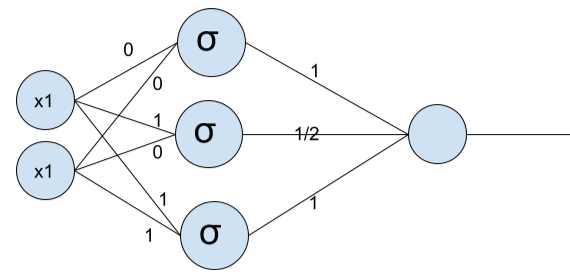

In [ ]:
import numpy as np
import math

#entradas
Xn = [[0, 0],[1/2, 0], [1, 0], [1/2, 1/2], [1, 1/2], [1, 1]]

#primera entrada
x1 = np.array([0, 0])

#salidas esperadas
Y = np.array([1, 5/4, 8, 0, 5/4, 1])

#entradas de la capa oculta
V = np.array([[0,0],[1,0],[1,1]])

#Salidas de la capa oculta
U = [1,1/2,1]

#Las salidas H
H= []

#Salidas Y primas
Yprima = []

#hacemos un que viaje por las entradas y las salidas deseadas

for Conta in range(len(Xn)):
  #producto punto entre x1 y las neuronas
  punto1 = np.dot(V,Xn[Conta])

  print("Este es el producto punto: ", punto1)

  #sigma o sigmoide
  Hn = []
  for i in punto1:
    Hn.append(1/(1+np.exp(-i)))
  H.append(Hn)

  print("Estos son los sigma: ", H)

  #producto punto entre H y U (salidas de las neuronas)
  YprimaN = 0

  for i in range(len(U)):
    YprimaN = Hn[i]*U[i] + YprimaN

  Yprima.append(YprimaN)

  print("Esta es Yprima: ", Yprima)

  #calculamos la perdida
  Loss = (YprimaN - Y[Conta])**2
  print("Esta es la perdida (Yprima - Y)**2: ", Loss)

  print("Nueva iteracion--------------------\n")

#-------------------------------------------------backpropagation-----------------------------

entrada = input("Ingrese el valor que desea cambiar: ")


#cambio del V1
if entrada=="V1":
  DLoss= np.dot(2*(YprimaN-Y[5])*1*U[2]*H[5][0]*(1-H[5][0]), Xn[5])
  print("Este es DeltaLoss: ", DLoss)
  V1n= np.dot(V[2],np.dot(0.5, DLoss))
  print("Este es el nuevo valor de V1: ", V1n)



Este es el producto punto:  [0 0 0]
Estos son los sigma:  [[0.5, 0.5, 0.5]]
Esta es Yprima:  [1.25]
Esta es la perdida (Yprima - Y)**2:  0.0625
Nueva iteracion--------------------

Este es el producto punto:  [0.  0.5 0.5]
Estos son los sigma:  [[0.5, 0.5, 0.5], [0.5, 0.6224593312018546, 0.6224593312018546]]
Esta es Yprima:  [1.25, 1.4336889968027817]
Esta es la perdida (Yprima - Y)**2:  0.03374164754641235
Nueva iteracion--------------------

Este es el producto punto:  [0 1 1]
Estos son los sigma:  [[0.5, 0.5, 0.5], [0.5, 0.6224593312018546, 0.6224593312018546], [0.5, 0.7310585786300049, 0.7310585786300049]]
Esta es Yprima:  [1.25, 1.4336889968027817, 1.5965878679450074]
Esta es la perdida (Yprima - Y)**2:  41.00368693294906
Nueva iteracion--------------------

Este es el producto punto:  [0.  0.5 1. ]
Estos son los sigma:  [[0.5, 0.5, 0.5], [0.5, 0.6224593312018546, 0.6224593312018546], [0.5, 0.7310585786300049, 0.7310585786300049], [0.5, 0.6224593312018546, 0.7310585786300049]]
Est